# Integrate-and-fire models

- Leaky integrated fire is a spike followed by a dygressing decay
- A spike is a simple addition of voltage
- The logarithmic decay is 1/e.

lets derive it!!

Cm - Membrane capacitance
R - Resistance of the ion channels
I - Current from other neurons


We want to understand how the volage changes over time.

V = IR
I = V/R

Kirchcofs current law
I = IR + IC

I_C(t) = C × dV/dt  = how fast the capacitor is charging / discharging
IR = V/R = current through a resistor 

I = (V/R) + C*(dV/dt)

**I(t) = C × dV/dt + V(t)/R**


Membrane capacitance C = 1 nF
Membrane resistance R = 10 MΩ
Threshold voltage V_th = -55 mV
Reset voltage V_reset = -70 mV
Resting voltage V_rest = -70 mV
Constant input current I₀ = 2.5 nA

In [4]:
class LIF():
    def __init__(self, Cm, R, V_th, V_reset, V_rest, I, time_steps):
        self.Cm = Cm  # Membrane capacitance
        self.R = R    # Membrane resistance
        self.V_th = V_th  # Threshold voltage
        self.V_reset = V_reset  # Reset voltage
        self.V_rest = V_rest  # Resting voltage
        self.I = I    # Input current
        self.tau = R * Cm  # Time constant
        
        self.time_steps = time_steps

    def lif(self):
        # Initialize arrays for storing voltage and spike times
        voltage = [self.V_reset]  # Start at reset voltage
        spikes = []
        dt = self.time_steps[1] - self.time_steps[0]  # Time step size
        
        # Simulate for each time step
        for t_idx, t in enumerate(self.time_steps[:-1]):
            # Current voltage
            V_current = voltage[-1]
            
            # Using the exact solution for the differential equation during a small time step
            # This ensures exponential behavior
            # dV/dt = (I*R - V)/tau
            # Solution: V(t+dt) = I*R + (V(t) - I*R) * exp(-dt/tau)
            V_inf = self.I * self.R + self.V_rest  # asymptotic voltage
            V_next = V_inf + (V_current - V_inf) * np.exp(-dt / self.tau)
            
            # Check for spike
            if V_next >= self.V_th:
                spikes.append(t + dt)
                V_next = self.V_reset
            
            voltage.append(V_next)
        
        return voltage, spikes
    
    def plot_results(self, voltage, spikes):
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.time_steps, voltage)
        
        # Plot horizontal lines for threshold and reset voltage
        plt.axhline(y=self.V_th, color='r', linestyle='--', alpha=0.7, label='Threshold')
        plt.axhline(y=self.V_reset, color='g', linestyle='--', alpha=0.7, label='Reset')
        
        # Plot spikes as vertical lines
        for spike in spikes:
            plt.axvline(x=spike, color='r', linestyle='-', alpha=0.5)
        
        # Calculate and display the equilibrium potential
        V_eq = self.I * self.R + self.V_rest
        plt.axhline(y=V_eq, color='b', linestyle='--', alpha=0.7, label=f'Equilibrium ({V_eq:.1f} mV)')
        
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.title('Leaky Integrate-and-Fire Neuron')
        plt.legend()
        plt.grid(True)
        plt.show()

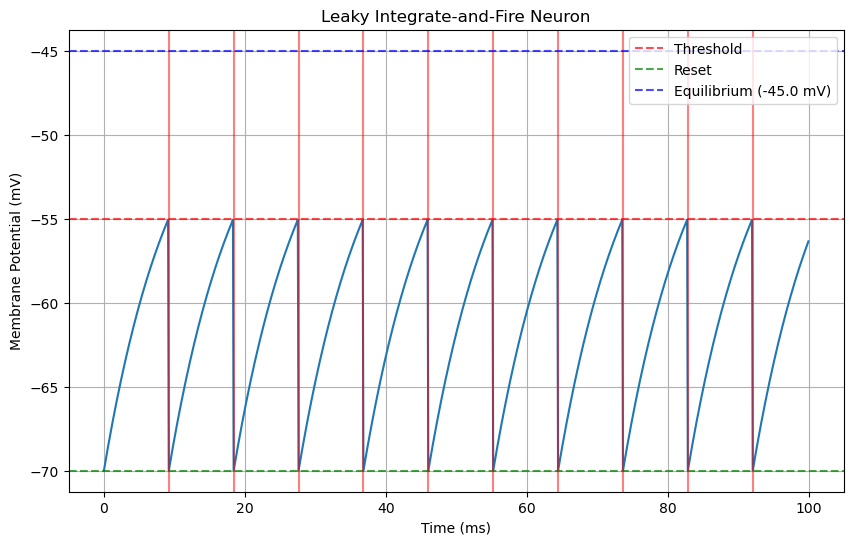

In [8]:
# Add these import statements at the beginning of your notebook
import numpy as np
import matplotlib.pyplot as plt

# Then your existing code will work
t_max = 100  # ms
dt = 0.1  # ms
time_steps = np.arange(0, t_max, dt)

neuron = LIF(
    Cm=1,           # nF
    R=10,           # MΩ
    V_th=-55,       # mV
    V_reset=-70,    # mV
    V_rest=-70,     # mV
    I=2.5,          # nA
    time_steps=time_steps
)

# Run simulation
voltage, spikes = neuron.lif()

# Plot results
neuron.plot_results(voltage, spikes)

In [ ]:
b) Spike Timing Dependent Plasticity (STDP): A biologically inspired learning rule where synaptic weights are updated based on the relative timing of pre and post-synaptic spikes.